**1st SOLUTION**

In [56]:
import torch
import numpy as np
import matplotlib.pyplot as plt

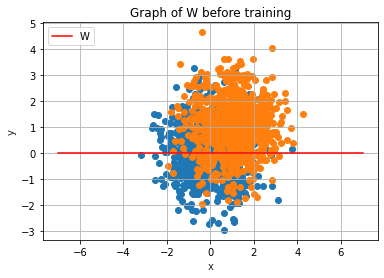

Number of changes: 568
tensor([-1.5954, -1.1744,  0.0000])


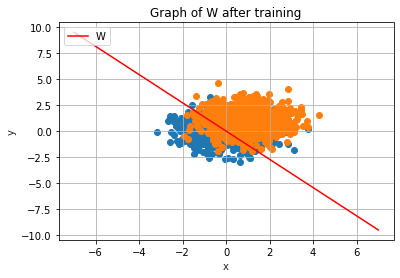

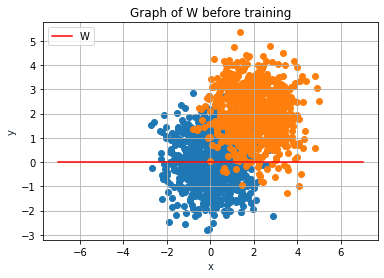

Number of changes: 187
tensor([-3.1751, -2.8515,  5.0000])


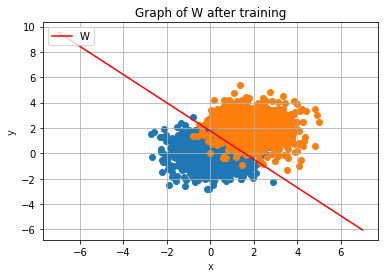

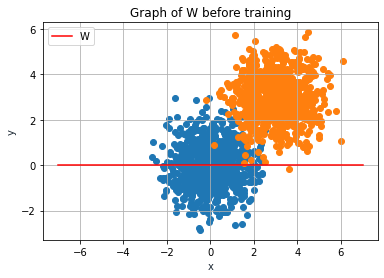

Number of changes: 59
tensor([-4.0429, -4.3485, 13.0000])


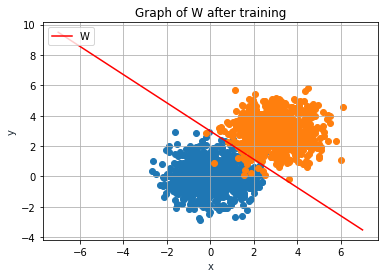

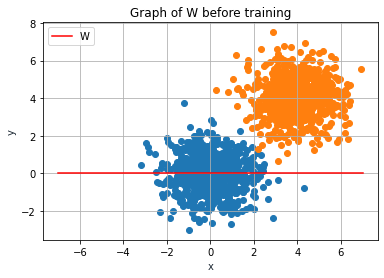

Number of changes: 30
tensor([-3.8674, -3.4305, 12.0000])


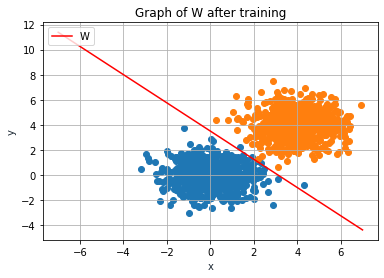

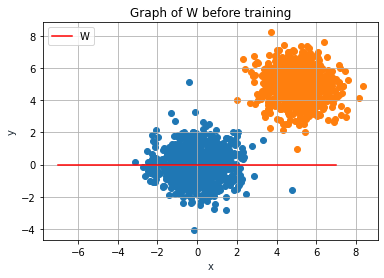

Number of changes: 19
tensor([-1.0658, -2.5237, 11.0000])


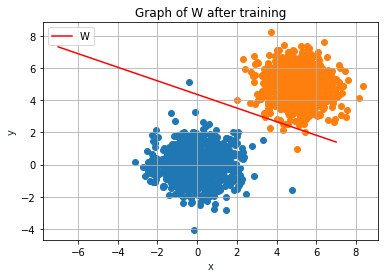

Line of seperabilities
[1, 2, 3, 4, 5]
Number of changes
[568, 187, 59, 30, 19]


In [57]:

#code to compare the gamma values and number of iterations '
seperability=[]
changes=[]
for i in range(1,6):

#creation of dataset
  D1=torch.normal(0.0, 1.0,size=[800,2])      
  D2=torch.normal(0.0+i, 1.0,size=[800,2])
  seperability.append(i)
# Add the extra dimension (1) to data
  X=torch.empty(1600,D1.size(1)+1).fill_(1)
    
  X[::2,:2] = D1
  X[1::2,:2] = D2
  Y=torch.empty(1600,1)

# prepare the labels 
  Y[::2,:2] = 1.0
  Y[1::2,:2] = -1.0

# Initialize W with all 0s
  W = torch.zeros(X.size(1))

# plot the data and W before training
  x = np.linspace(-7,7,100)
  y = np.zeros(100,) 
  plt.plot(x, y, '-r', label='W')
  plt.title('Graph of W before training')
  plt.xlabel('x', color='#1C2833')
  plt.ylabel('y', color='#1C2833')
  plt.legend(loc='upper left')
  plt.scatter(D1[:,0], D1[:,1])
  plt.scatter(D2[:,0], D2[:,1])
  plt.grid()
  plt.show()

#The perceptron training algorithm
  def train_perceptron(x, y, w, nb_epochs_max):  
    for e in range(nb_epochs_max):
      nb_changes = 0
      for i in range(x.size(0)):
        if x[i].dot(w) * y[i] <= 0:
          w = w + y[i] * x[i]
          nb_changes = nb_changes + 1
          #print('Number of changes: %d'%nb_changes) # prints the number of changes every epoch
        if nb_changes == 0:
          print('Early stopping at epoch number %d',e) 
          break;
      print('Number of changes: %d'%nb_changes)  # prints the number of chages in the end 
      changes.append(nb_changes) 
      return w

# Call the traning algorithm
  W = train_perceptron(X,Y, W, 5)
  print(W)

# Plot the data and W after training
  x = np.linspace(-7,7,100)
  y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
  plt.plot(x, y, '-r', label='W')
  plt.title('Graph of W after training')
  plt.xlabel('x', color='#1C2833')
  plt.ylabel('y', color='#1C2833')
  plt.legend(loc='upper left')
  plt.scatter(D1[:,0], D1[:,1])
  plt.scatter(D2[:,0], D2[:,1])
  plt.grid()
  plt.show()
print('Line of seperabilities')
print(seperability)
print('Number of changes')
print(changes)

**OBSERVATION**:



As the level of separability γ increases, the number of iterations required for perfect classification k decreases. 
This is in line with the result discussed in class that a more separable dataset requires 
fewer iterations for the Perceptron Learning Algorithm to converge to a perfect classifier. 

---





**2nd SOLUTION**

In [58]:
import torch
import numpy as np
import matplotlib.pyplot as plt

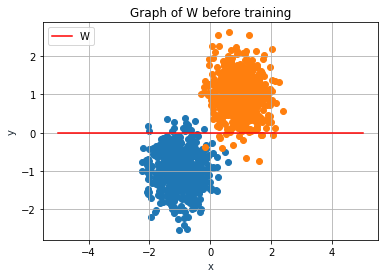

tensor([ -88.7764, -103.0002,   -8.1000])


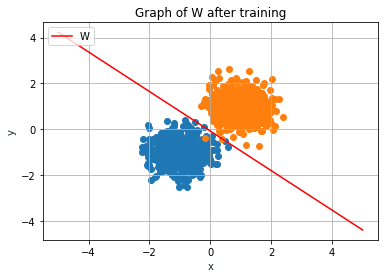

In [59]:
#This usually takes time to run!!
D1=torch.normal(-1.0, .5,size=[600,2])      
D2=torch.normal(1.0, .5,size=[600,2])

# Add the extra dimension (1) to data
X=torch.empty(1200,D1.size(1)+1).fill_(1)
    
X[::2,:2] = D1
X[1::2,:2] = D2
Y=torch.empty(1200,1)

# prepare the labels 
Y[::2,:2] = 1.0
Y[1::2,:2] = -1.0

# Initialize W with all 0s
W = torch.zeros(X.size(1))

# plot the data and W before training
x = np.linspace(-5,5,100)
y = np.zeros(100,) 
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W before training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.grid()
plt.show()

#using the hinge loss function for gradient decent
iterations=1000
lr=0.1

for temp in range(iterations):
    X_new = []
    for i in X:
      X_new.append(np.dot(i,W))
    X_new = torch.Tensor(X_new)
    for i in range(Y.shape[0]):
        loss = max(0,1-X_new[i]*Y[i])
        if loss == 0:
          d = 0
        else:
          d = -X[i]*Y[i]
        W-=lr*d
#updated equation
print(W)

#ploting the graph after gradient decent
x = np.linspace(-5,5,100)
y = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.grid()
plt.show()

3rd Solution

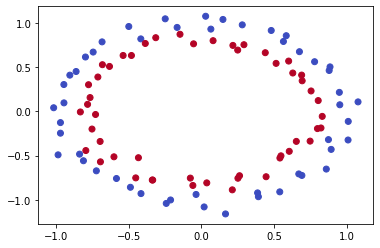

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# generate binary classification dataset of two concentric circles
X, y = make_circles(n_samples=100, noise=0.05, random_state=0)

# # Train a non-linear SVM with RBF kernel
# clf = SVC(kernel='rbf', C=1, gamma=0.1)
# clf.fit(X, y)

# # Plot the decision boundary
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
#                      np.arange(y_min, y_max, 0.02))
# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot the points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()
